# Monte Carlo Sampling

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
x_samples = torch.linspace(-2, 2, 200)
lower_limit = -2
upper_limit = 2
px_uniform = 1 / (upper_limit - lower_limit) * torch.ones(len(x_samples))

In [7]:
def custom_fn(x): return x**2


y = custom_fn(x_samples)
y_pdf = 1 / (2 * torch.sqrt(y + 1e-2))

# monte carlo samples
n = 1000

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

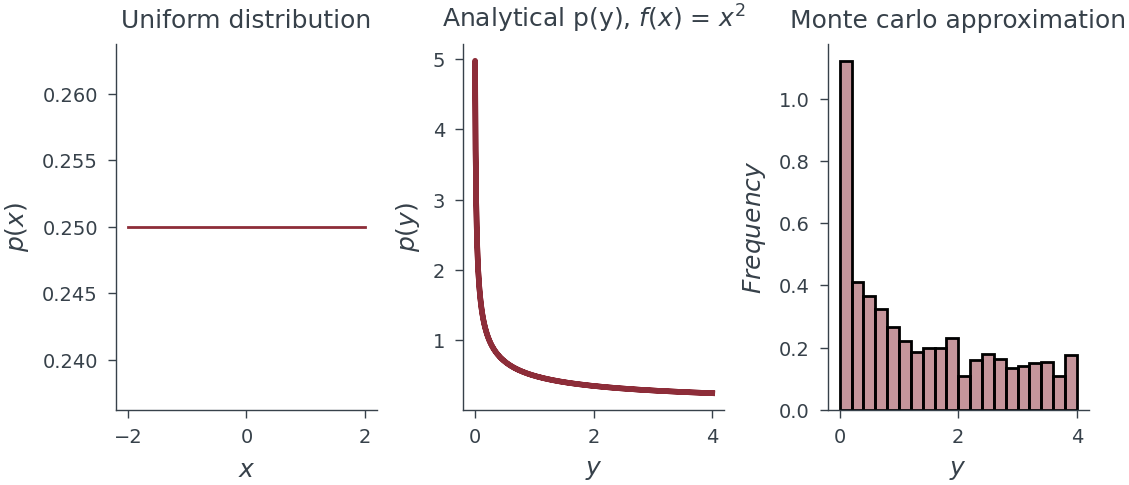

In [13]:
torch.manual_seed(0)  # Set random seed for reproducibility
uniform_samples = torch.rand(n, 1) * (upper_limit - lower_limit) + lower_limit
fn_samples = custom_fn(uniform_samples)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("Uniform distribution")
ax[0].plot(x_samples, px_uniform, "-")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$p(x)$")

ax[1].set_title("Analytical p(y), $f(x)$ = $x^2$")
ax[1].plot(y, y_pdf, "-", linewidth=2)
ax[1].set_xlabel("$y$")
ax[1].set_ylabel("$p(y)$")

ax[2].set_title("Monte carlo approximation")
sns.histplot(fn_samples.numpy(), kde=False,
             ax=ax[2], bins=20, stat="density", edgecolor="k", linewidth=1, legend=False)
ax[2].set_xlabel("$y$")
ax[2].set_ylabel("$Frequency$")

sns.despine()
# plt.savefig("figures/sampling/mc_sampling_ex.pdf", bbox_inches="tight")
plt.show()